Momepy

Import Packages

In [2]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\geopandas\_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Import dataset and plot

In [3]:
streets = gpd.read_file(momepy.datasets.get_path('bubenec'), layer='streets')
streets

,geometry
0,"LINESTRING (1603585.640 6464428.774, 1603413.2..."
1,"LINESTRING (1603268.502 6464060.781, 1603296.8..."
2,"LINESTRING (1603607.303 6464181.853, 1603592.8..."
3,"LINESTRING (1603678.970 6464477.215, 1603675.6..."
4,"LINESTRING (1603537.194 6464558.112, 1603557.6..."
5,"LINESTRING (1603363.558 6464031.885, 1603376.5..."
6,"LINESTRING (1603413.206 6464228.730, 1603274.4..."
7,"LINESTRING (1603706.388 6464617.784, 1603705.7..."
8,"LINESTRING (1603226.958 6464160.158, 1603039.9..."
9,"LINESTRING (1603039.963 6464087.491, 1602902.3..."


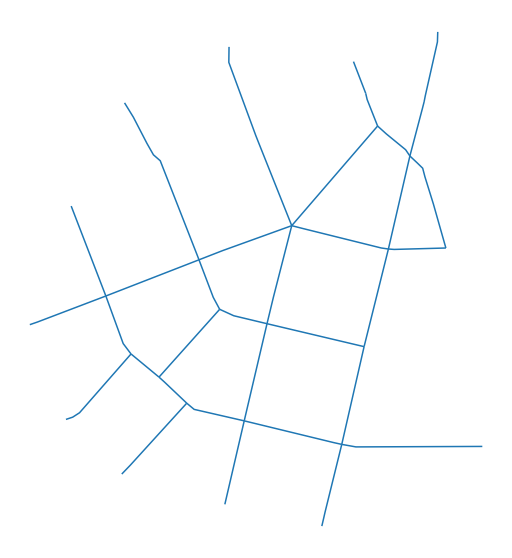

In [4]:
f, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax)
ax.set_axis_off()
plt.show()

Convert to a network

In [5]:
# primal allows the length to be saved so it can be used as a weight later
# if you change to dual will save the angle between the two segments
graph = momepy.gdf_to_nx(streets, approach='primal')

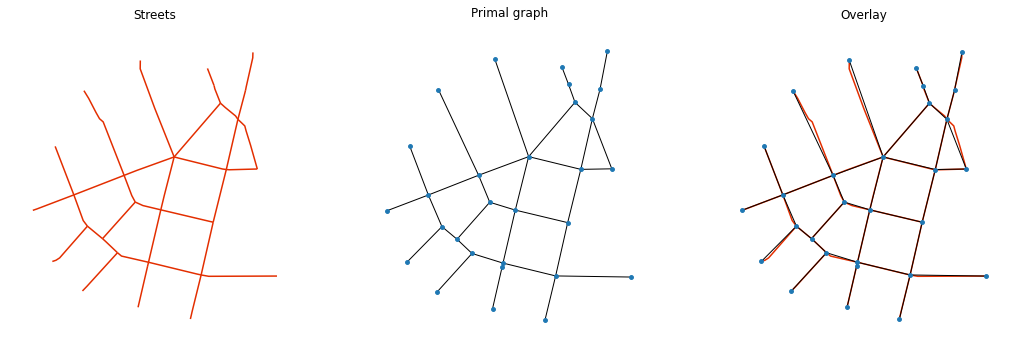

In [6]:
f, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
streets.plot(color='#e32e00', ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Primal graph", "Overlay")[i])
    facet.axis("off")
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=ax[1], node_size=15)
streets.plot(color='#e32e00', ax=ax[2], zorder=-1)
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=ax[2], node_size=15)